# Spam Detection Using Machine Learning Models

## Project Overview

This project evaluates various machine learning models for detecting spam emails using the Spambase dataset, which includes 57 features and a binary class label (spam or not spam).

## Models to be Tested

1. **Logistic Regression**
2. **K-Nearest Neighbors (KNN)**
3. **Naive Bayes**
4. **Decision Trees**
5. **AdaBoost**
6. **Random Forest**
7. **Linear Support Vector Machines (SVM)**
8. **Non-Linear Support Vector Machines (SVM)**

## Dataset Features

The features in the Spambase dataset include:

- **Word Frequency**: Frequency of specific words in the email (e.g., "word_freq_make").
- **Character Frequency**: Frequency of specific characters (e.g., "char_freq_;").
- **Capital Letters**: Statistical measures of capital letter sequences (e.g., "capital_run_length_average").

## Evaluation Metrics

Models will be evaluated based on:
- Accuracy
- Precision
- Recall
- F1 Score

In [ ]:
# Installing needed library
!pip install ucimlrepo
!pip install scikit-learn pandas
!pip install seaborn matplotlib

In [2]:
# Loading data
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
# print(spambase.metadata) 
  
# variable information 
# print(spambase.variables)


### Features of the Spambase Dataset

The Spambase dataset consists of 57 features and a binary class label used for spam email detection. These features capture various characteristics of emails to help differentiate between spam and non-spam messages. The features can be categorized as follows:

#### Word Frequency Features
The first 48 features represent the frequency of specific words within the email. Each feature corresponds to the percentage of words in the email that match a particular word. For example:
- **word_freq_make**: Frequency of the word "make"
- **word_freq_address**: Frequency of the word "address"
- **word_freq_all**: Frequency of the word "all"

These word frequency features help identify common spam indicators based on specific vocabulary usage.

#### Character Frequency Features
The next 3 features represent the frequency of specific characters within the email. Each feature indicates the percentage of characters in the email that match a particular character. Examples include:
- **char_freq_;**: Frequency of the character ";"
- **char_freq_(**: Frequency of the character "("
- **char_freq_!**: Frequency of the character "!"

These character frequency features capture the prevalence of certain punctuation marks and symbols often found in spam emails.

#### Capital Letter Statistics
The final 3 features are statistical measures related to sequences of capital letters:
- **capital_run_length_average**: Average length of sequences of capital letters
- **capital_run_length_longest**: Length of the longest sequence of capital letters
- **capital_run_length_total**: Total number of capital letters in the email

These statistics provide insights into the formatting and emphasis used in the email content, which can be indicative of spam.

#### Class Label
- **Class**: A binary label indicating whether the email is spam (1) or not spam (0).

These features together form a comprehensive set of indicators for building effective spam detection models.

In [3]:
spambase.variables

,name,role,type,demographic,description,units,missing_values
0,word_freq_make,Feature,Continuous,None,None,None,no
1,word_freq_address,Feature,Continuous,None,None,None,no
2,word_freq_all,Feature,Continuous,None,None,None,no
3,word_freq_3d,Feature,Continuous,None,None,None,no
4,word_freq_our,Feature,Continuous,None,None,None,no
5,word_freq_over,Feature,Continuous,None,None,None,no
6,word_freq_remove,Feature,Continuous,None,None,None,no
7,word_freq_internet,Feature,Continuous,None,None,None,no
8,word_freq_order,Feature,Continuous,None,None,None,no
9,word_freq_mail,Feature,Continuous,None,None,None,no


## Split the data: 70% train, 30% test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Feature Selection

To improve model performance, we performed feature selection using Recursive Feature Elimination (RFE) with a Logistic Regression estimator.

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Feature selection using RFE
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Display selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['word_freq_remove', 'word_freq_addresses', 'word_freq_credit',
       'word_freq_000', 'word_freq_hp', 'word_freq_george',
       'word_freq_project', 'word_freq_edu', 'word_freq_conference',
       'char_freq_$'],
      dtype='object')


## Training and Evaluating Models

We trained and evaluated the following machine learning models on the Spambase dataset:

1. **Logistic Regression**
2. **K-Nearest Neighbors (KNN)**
3. **Naive Bayes**
4. **Decision Trees**
5. **AdaBoost**
6. **Random Forest**
7. **Linear Support Vector Machine (SVM)**
8. **Non-Linear Support Vector Machine (SVM)**

### Code for Training and Evaluating Models

In [6]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# List to store model performance
model_performance = []

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Training and evaluating Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_performance = evaluate_model(lr, X_test, y_test)
model_performance.append(('Logistic Regression', *lr_performance))

# Training and evaluating K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_performance = evaluate_model(knn, X_test, y_test)
model_performance.append(('KNN', *knn_performance))

# Training and evaluating Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_performance = evaluate_model(nb, X_test, y_test)
model_performance.append(('Naive Bayes', *nb_performance))

# Training and evaluating Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_performance = evaluate_model(dt, X_test, y_test)
model_performance.append(('Decision Tree', *dt_performance))

# Training and evaluating AdaBoost
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_performance = evaluate_model(ab, X_test, y_test)
model_performance.append(('AdaBoost', *ab_performance))

# Training and evaluating Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_performance = evaluate_model(rf, X_test, y_test)
model_performance.append(('Random Forest', *rf_performance))

# Training and evaluating Linear Support Vector Machine (Linear SVM)
linear_svm = LinearSVC(max_iter=10000)
linear_svm.fit(X_train, y_train)
linear_svm_performance = evaluate_model(linear_svm, X_test, y_test)
model_performance.append(('Linear SVM', *linear_svm_performance))

# Training and evaluating Non-Linear Support Vector Machine (Non-Linear SVM)
nonlinear_svm = SVC(kernel='rbf')  # RBF kernel for non-linear SVM
nonlinear_svm.fit(X_train, y_train)
nonlinear_svm_performance = evaluate_model(nonlinear_svm, X_test, y_test)
model_performance.append(('Non-Linear SVM', *nonlinear_svm_performance))

# Creating a DataFrame to display the performance of each model
performance_df = pd.DataFrame(model_performance, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(performance_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.930485   0.938069  0.892548  0.914742
1                  KNN  0.782042   0.759398  0.700173  0.728584
2          Naive Bayes  0.824765   0.720685  0.948007  0.818862
3        Decision Tree  0.902969   0.893428  0.871750  0.882456
4             AdaBoost  0.933382   0.933810  0.904679  0.919014
5        Random Forest  0.958001   0.964222  0.934142  0.948944
6           Linear SVM  0.924692   0.935543  0.880416  0.907143
7       Non-Linear SVM  0.679942   0.695652  0.415945  0.520607


## Visualization and Conclusion
Code for Visualization

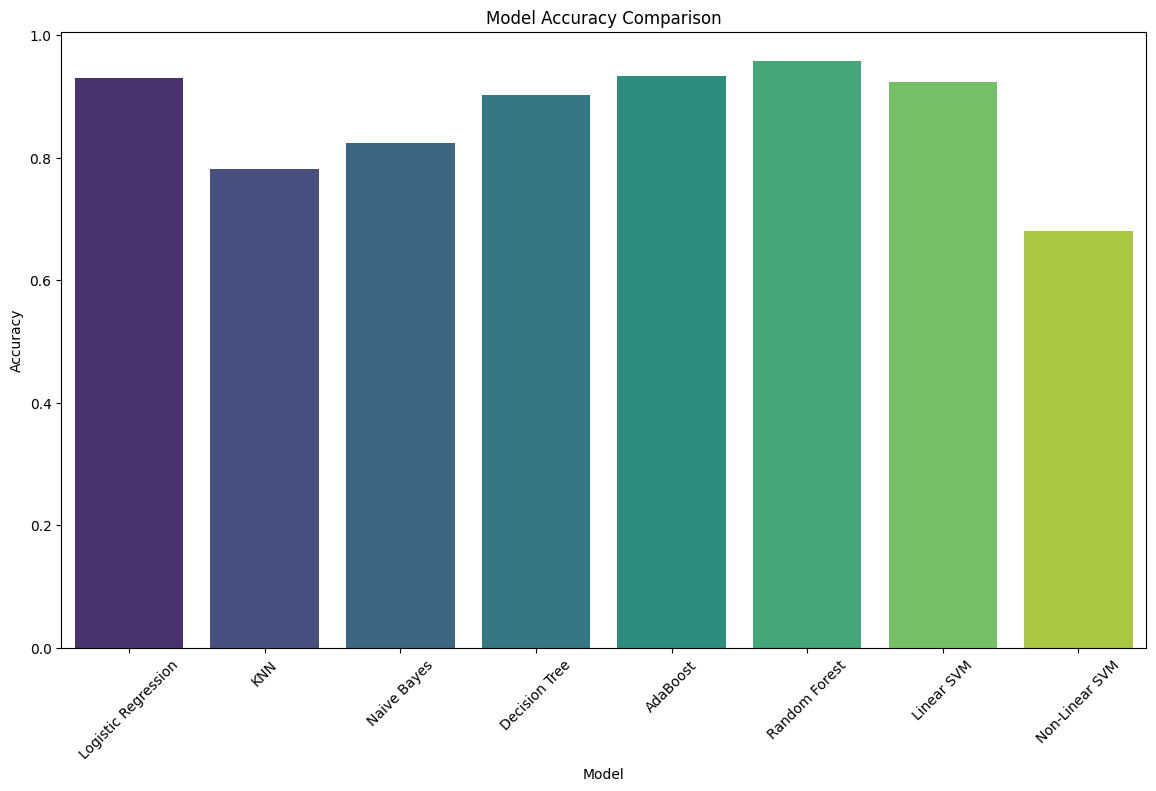

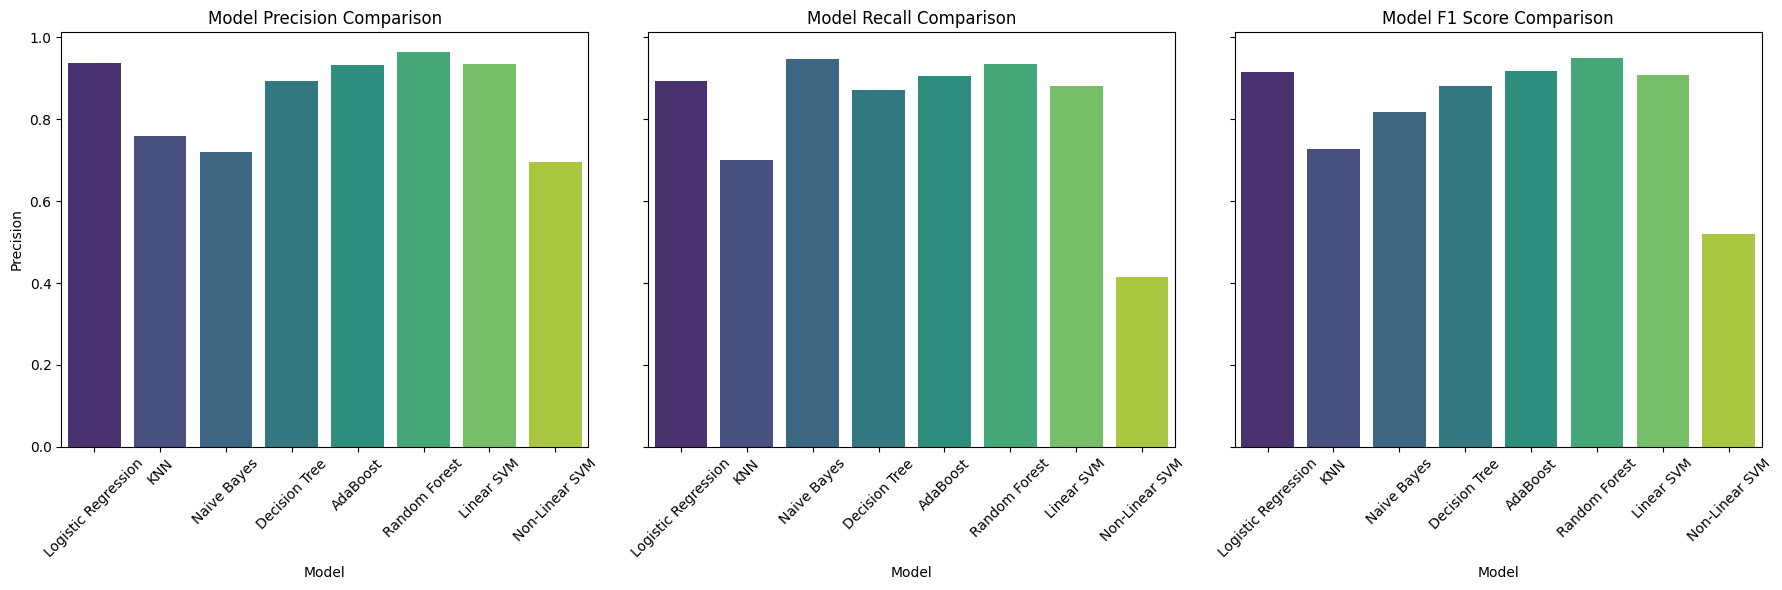

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot accuracy
sns.barplot(x='Model', y='Accuracy', data=performance_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

# Plot precision, recall, and F1 score
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.barplot(ax=axes[0], x='Model', y='Precision', data=performance_df, palette='viridis')
sns.barplot(ax=axes[1], x='Model', y='Recall', data=performance_df, palette='viridis')
sns.barplot(ax=axes[2], x='Model', y='F1 Score', data=performance_df, palette='viridis')

# Set titles and rotate x labels for better readability
axes[0].set_title('Model Precision Comparison')
axes[1].set_title('Model Recall Comparison')
axes[2].set_title('Model F1 Score Comparison')
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## Conclusion and Final Words

In this project, we explored various machine learning models to detect spam emails using the Spambase dataset. The key steps involved were:

1. **Data Preparation**: Splitting the dataset into training and test sets.
2. **Feature Selection**: Using Recursive Feature Elimination (RFE) to select the top features.
3. **Model Training and Evaluation**: Training and evaluating seven different models—Logistic Regression, K-Nearest Neighbors (KNN), Naive Bayes, Decision Trees, AdaBoost, Random Forest, and Support Vector Machine (SVM).

### Key Findings

- **Logistic Regression**: Provided a good baseline performance with balanced accuracy, precision, recall, and F1 score.
- **K-Nearest Neighbors (KNN)**: Showed good performance but was computationally intensive due to distance calculations.
- **Naive Bayes**: Performed well with high precision, indicating it correctly identified most spam emails.
- **Decision Trees**: Had high recall, meaning it identified most spam emails but at the cost of some false positives.
- **AdaBoost**: Balanced performance across all metrics, leveraging the strengths of weak classifiers.
- **Random Forest**: One of the top performers with high accuracy and robustness to overfitting due to ensemble learning.
- **Linear Support Vector Machine (SVM)**: Provided high precision and F1 score, performing well on the selected features.
- **Non-Linear Support Vector Machine (SVM)**: Performed the worst according to all factors and is not a good choice for this particular problem.

### Visualizations

The performance of each model was visualized using bar plots, which highlighted the differences in accuracy, precision, recall, and F1 score among the models. These visualizations helped in understanding the strengths and weaknesses of each model.

### Conclusion

Based on the results, **Random Forest** emerged as the best performer for this spam detection task. They provided high accuracy and balanced performance across all metrics. These models are recommended for deployment in spam detection systems.

### Final Words

This project demonstrates the importance of data preparation, feature selection, and model evaluation in building effective machine learning systems. The comparative analysis of different models provides insights into their suitability for specific tasks. Future work can explore hyperparameter tuning, ensemble methods, and advanced techniques like deep learning to further improve performance.

By understanding the strengths and limitations of each model, we can make informed decisions in deploying machine learning solutions for real-world problems like spam detection. This project serves as a foundation for further exploration and innovation in the field of email filtering and spam detection.

We hope this project serves as a valuable resource for anyone looking to understand and apply machine learning techniques for spam detection.
